# Decision Tree Algorithm
Objective:-For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

Data can be found at https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

Problem Statement:- if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

### Import dataset

In [2]:
os.chdir('E:\Github Repo\TSF Task 2')
Iris_dataset=pd.read_csv('Iris.csv')
Iris_dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
Iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
Iris_dataset.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Splitting  the data into the training set and test set using Scikit-Learn's built-in train_test_split() method.

In [5]:
X=Iris_dataset.iloc[:,1:5].values 
y=Iris_dataset.iloc[:,5].values

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y.reshape(-1, 1)).toarray()
# Avoiding the Dummy Variable Trap
y= y[:, 1:]

In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Fitting the Decision tree classifier to the dataset 

In [8]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0) 
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the Test set results

In [9]:
y_pred =Classifier.predict(x_test)

### Comparing Actual and Predicted Values

In [10]:
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
df

,Actual,Predicted
0,"[[0.0, 1.0], [1.0, 0.0], [0.0, 0.0], [0.0, 1.0...","[[0.0, 1.0], [1.0, 0.0], [0.0, 0.0], [0.0, 1.0..."


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(conf)

accuracy_score(y_test, y_pred)

[[33  1]
 [ 0 11]]


0.9777777777777777

### Let us visualize the Decision Tree to understand it better.


In [12]:
# Import necessary libraries for graph viz 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.tree import plot_tree

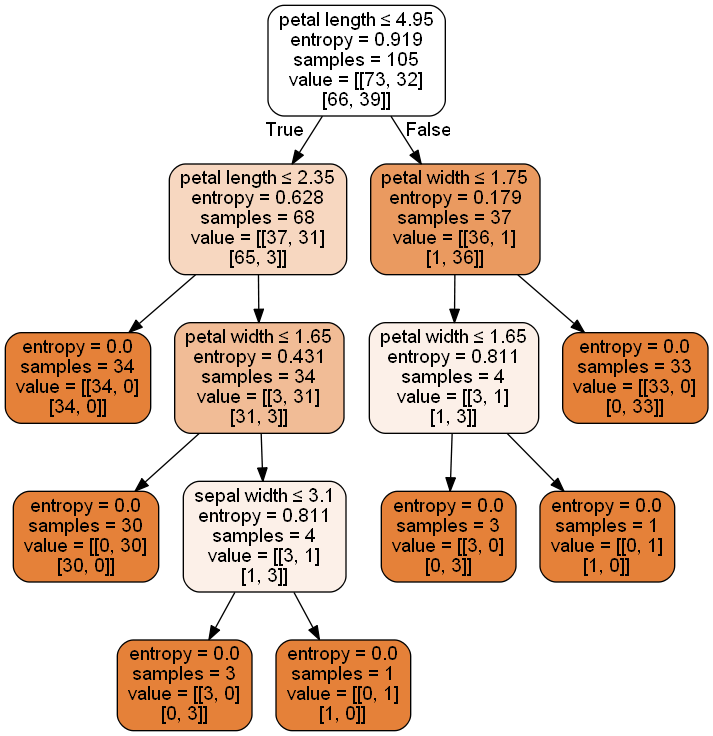

In [13]:
# Visualize the decision tree
dot_data = tree.export_graphviz(Classifier, out_file=None, 
                                 feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
                                 filled=True, rounded=True,
                                 special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data) 

Image(graph.create_png())

### Another Technique to plot decision tree

[Text(1395.0, 2446.2, 'X[2] <= 4.95\nentropy = 0.919\nsamples = 105\nvalue = [[73, 32]\n[66, 39]]'),
 Text(558.0, 1902.6, 'X[2] <= 2.35\nentropy = 0.628\nsamples = 68\nvalue = [[37, 31]\n[65, 3]]'),
 Text(279.0, 1359.0, 'entropy = 0.0\nsamples = 34\nvalue = [[34, 0]\n[34, 0]]'),
 Text(837.0, 1359.0, 'X[3] <= 1.65\nentropy = 0.431\nsamples = 34\nvalue = [[3, 31]\n[31, 3]]'),
 Text(558.0, 815.3999999999999, 'entropy = 0.0\nsamples = 30\nvalue = [[0, 30]\n[30, 0]]'),
 Text(1116.0, 815.3999999999999, 'X[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [[3, 1]\n[1, 3]]'),
 Text(837.0, 271.7999999999997, 'entropy = 0.0\nsamples = 3\nvalue = [[3, 0]\n[0, 3]]'),
 Text(1395.0, 271.7999999999997, 'entropy = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(2232.0, 1902.6, 'X[3] <= 1.75\nentropy = 0.179\nsamples = 37\nvalue = [[36, 1]\n[1, 36]]'),
 Text(1953.0, 1359.0, 'X[3] <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [[3, 1]\n[1, 3]]'),
 Text(1674.0, 815.3999999999999, 'entropy = 0.0\nsampl

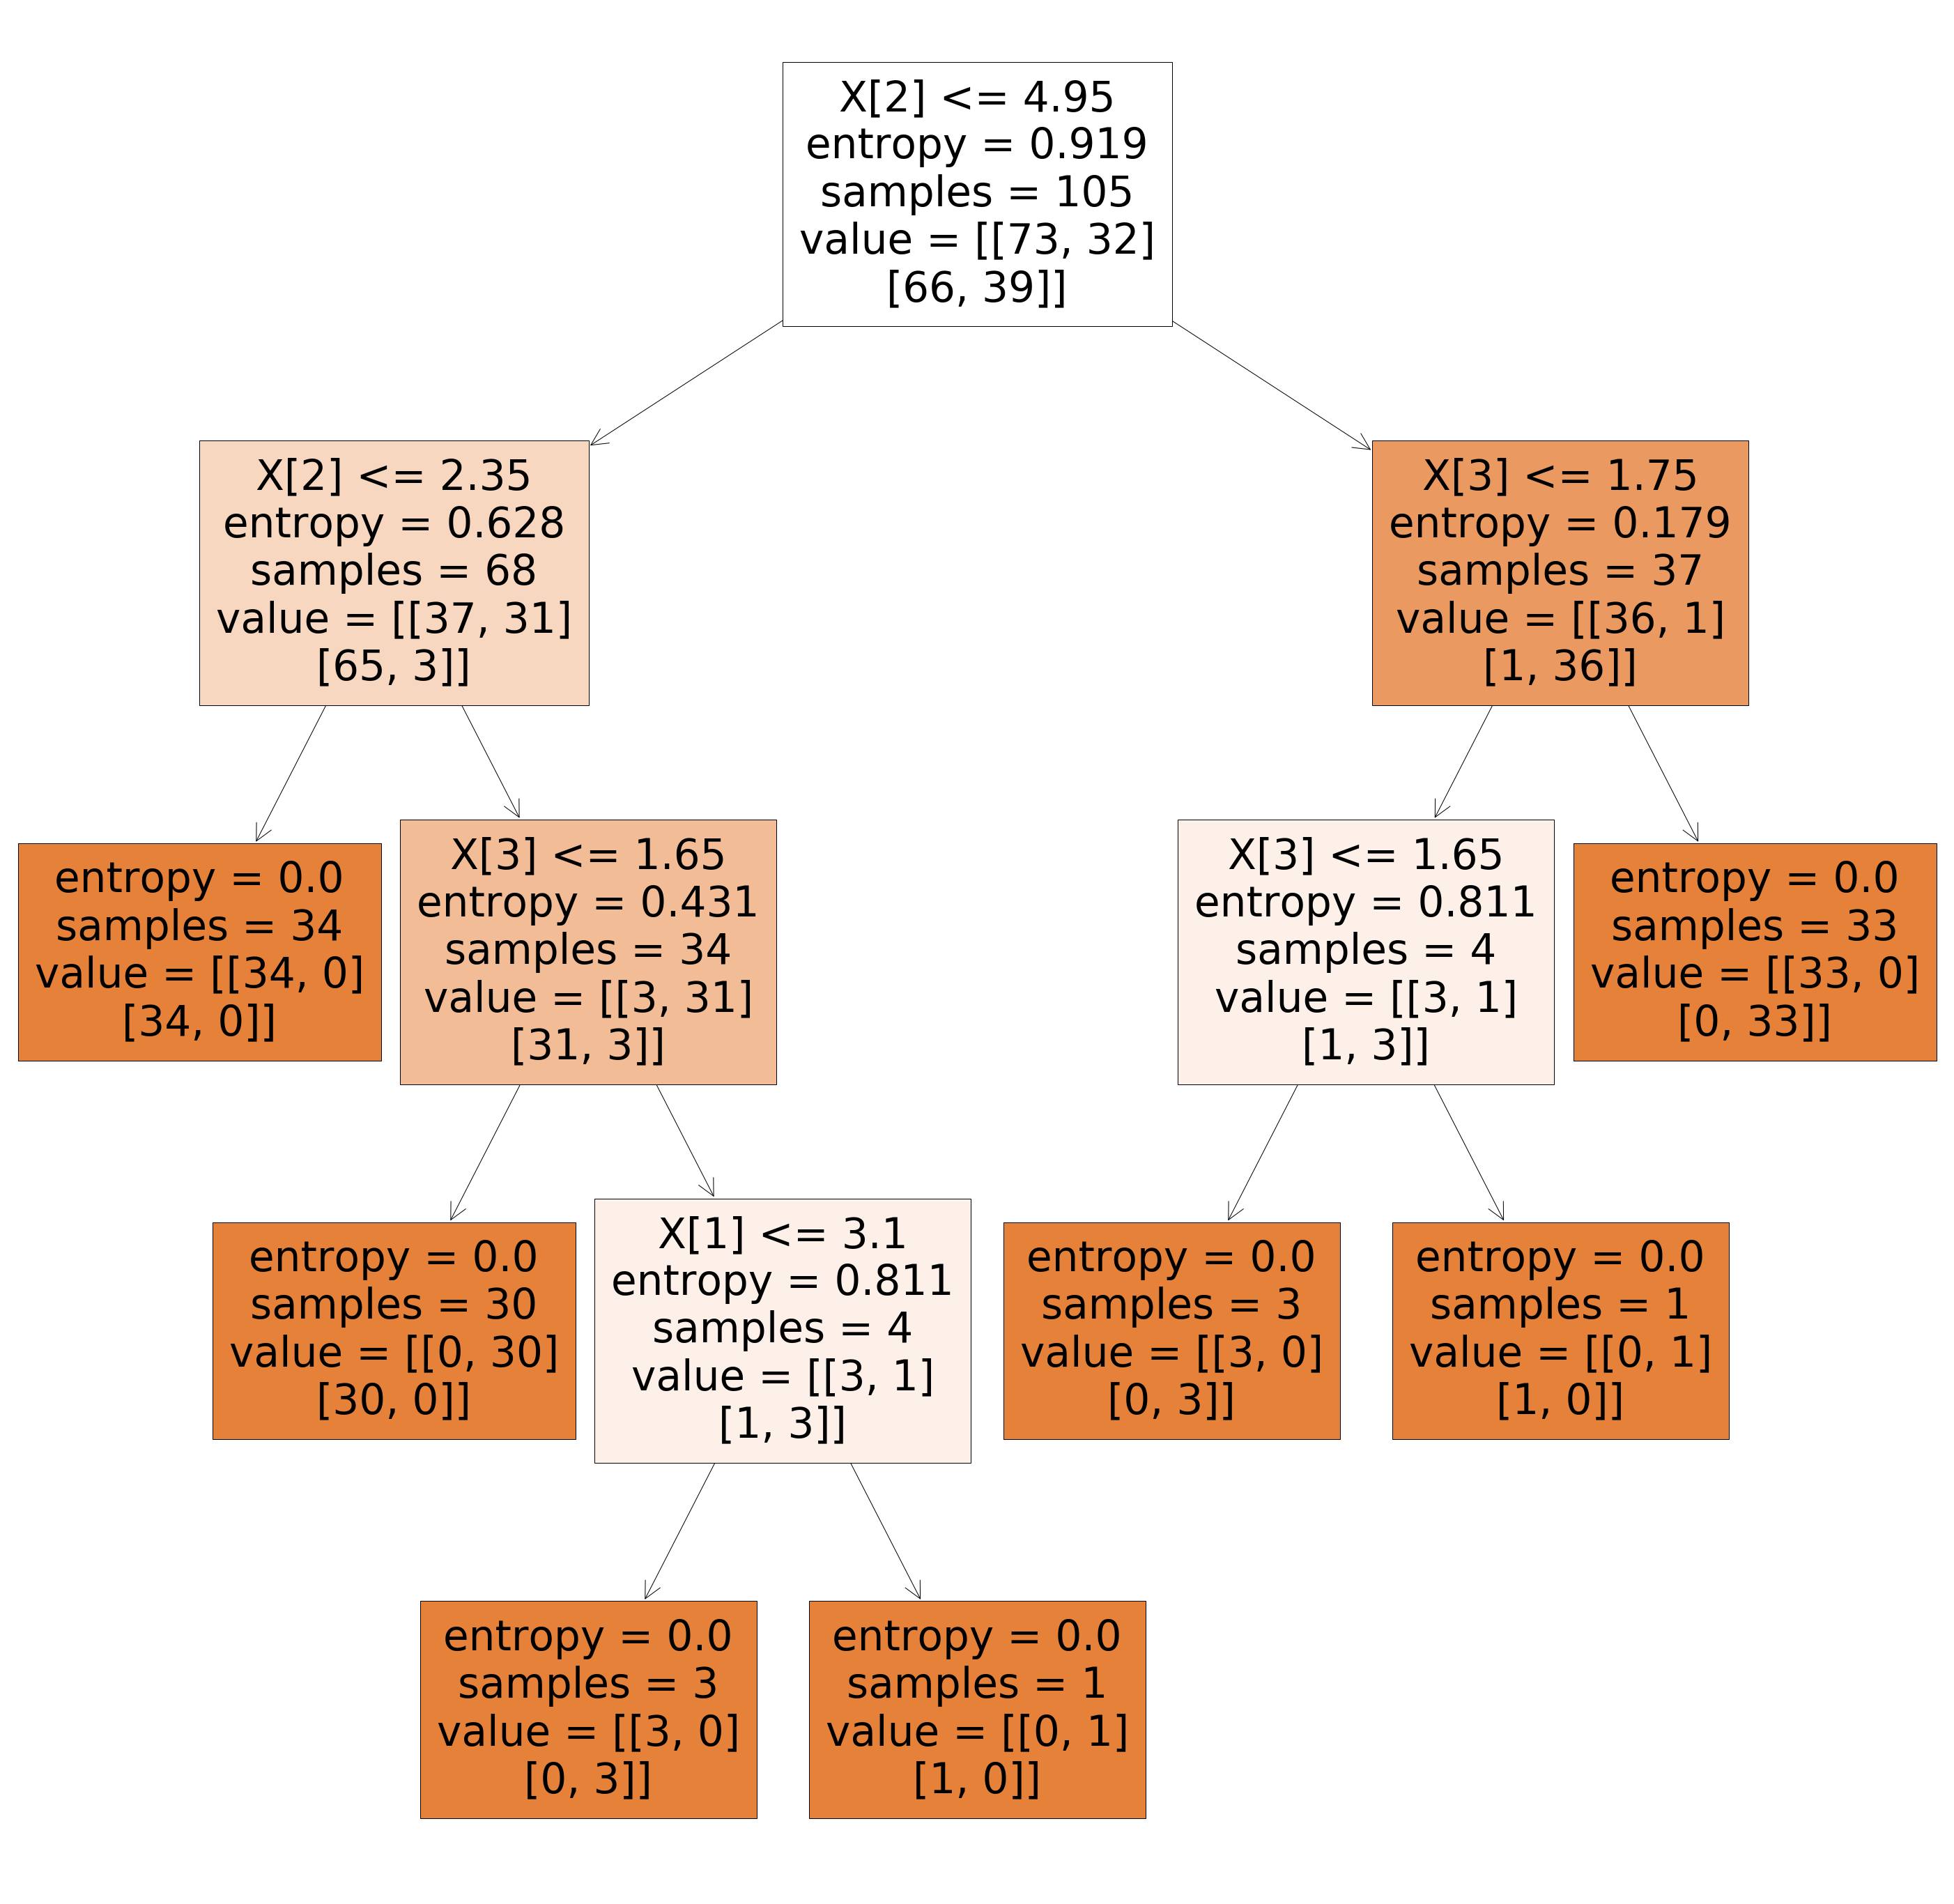

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(Classifier, filled = True)

### Classification Report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29
 samples avg       0.62      0.62      0.62        29

